Filename: C:\Users\adity\Desktop\test1_lights_L.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (3120, 2805)   int16 (rescales to uint16)   

Primary Header:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3120 / length of data axis 1                          
NAXIS2  =                 2805 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling fac

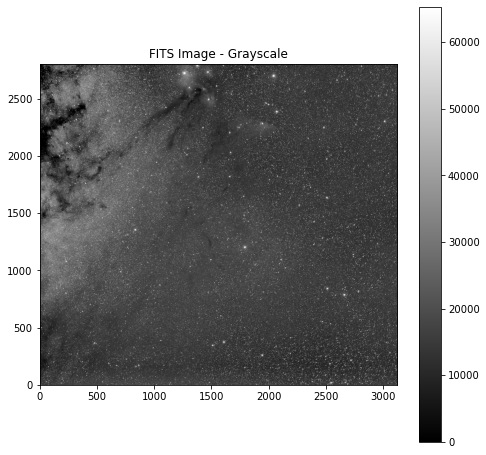

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to the FITS file
fits_file = r"C:\Users\adity\Desktop\test1_lights_L.fits"

# Check if the file exists
if os.path.exists(fits_file):
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        # Print a summary of the FITS file content
        hdul.info()
        
        # Access the primary header and data
        primary_hdu = hdul[0]
        print("\nPrimary Header:")
        print(repr(primary_hdu.header))
        
        # Access the data in the primary HDU
        image_data = primary_hdu.data
        print(f"\nOriginal Data shape: {image_data.shape}")
        
        # Check dimensionality and handle accordingly
        if image_data.ndim == 3:
            # Average the three channels to create a grayscale image
            grayscale_image = np.mean(image_data, axis=0)
        elif image_data.ndim == 2:
            # Data is already 2D
            grayscale_image = image_data
        else:
            raise ValueError(f"Unexpected data shape {image_data.shape}. Cannot visualize.")
        
        print(f"\nGrayscale Image shape: {grayscale_image.shape}")
        
        # Plot the grayscale image
        plt.figure(figsize=(8, 8))
        plt.imshow(grayscale_image, cmap='gray', origin='lower')
        plt.colorbar()  # Show a colorbar
        plt.title("FITS Image - Grayscale")
        plt.show()
else:
    print("FITS file not found at the specified location.")


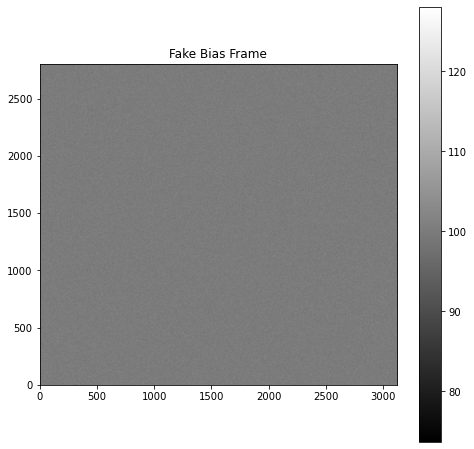

Fake bias frame saved to: C:\Users\adity\Desktop\fake_bias_frame.fits


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Load the image data (using the same shape as your image)
image_shape = (2805, 3120)

# Generate a fake bias frame
bias_level = 100  # Baseline bias value
bias_noise = 5    # Small noise level
fake_bias_frame = np.random.normal(loc=bias_level, scale=bias_noise, size=image_shape)

# Plot the fake bias frame
plt.figure(figsize=(8, 8))
plt.imshow(fake_bias_frame, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Fake Bias Frame")
plt.show()

# Path to save the fake bias frame
bias_fits_file = r"C:\Users\adity\Desktop\fake_bias_frame.fits"

# Check if the file exists and remove it
if os.path.exists(bias_fits_file):
    try:
        os.remove(bias_fits_file)
        print(f"Removed existing file: {bias_fits_file}")
    except PermissionError as e:
        print(f"Permission error: {e}. Close any programs using the file and try again.")
        exit()

# Save the fake bias frame as a FITS file
fits.writeto(bias_fits_file, fake_bias_frame.astype(np.float32), overwrite=True)
print(f"Fake bias frame saved to: {bias_fits_file}")


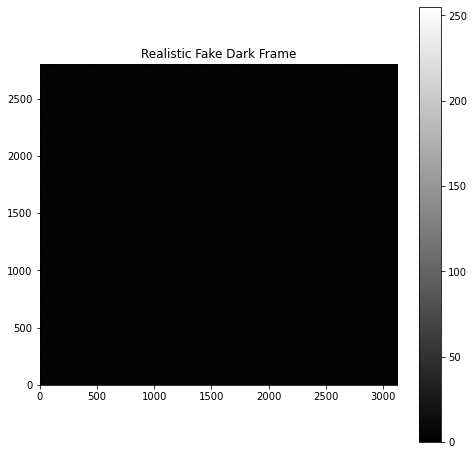

Realistic fake dark frame saved to: C:\Users\adity\Desktop\realistic_fake_dark_frame.fits


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the image data (assuming the same shape as your image)
# For demonstration, let's assume the image has shape (2805, 3120)
image_shape = (2805, 3120)

# Generate a fake dark frame
# Dark frames should be close to black with small thermal noise
dark_level = 0  # Baseline dark value should be close to 0
dark_noise = 10  # Small noise to simulate thermal noise

# Generate dark frame with small random noise around the dark level
fake_dark_frame = np.random.normal(loc=dark_level, scale=dark_noise, size=image_shape)

# Ensure that no pixel values are below 0 (as negative values are not valid)
fake_dark_frame[fake_dark_frame < 0] = 0

# Plot the fake dark frame
plt.figure(figsize=(8, 8))
plt.imshow(fake_dark_frame, cmap='gray', origin='lower', vmin=0, vmax=255)
plt.colorbar()  # Show a colorbar
plt.title("Realistic Fake Dark Frame")
plt.show()

# Optionally, save the dark frame as a FITS file
dark_fits_file = r"C:\Users\adity\Desktop\realistic_fake_dark_frame.fits"

# Save the fake dark frame as a FITS file
fits.writeto(dark_fits_file, fake_dark_frame.astype(np.float32), overwrite=True)
print(f"Realistic fake dark frame saved to: {dark_fits_file}")



File verified: C:\Users\adity\Desktop\test1_lights_L.fits
File verified: C:\Users\adity\Desktop\realistic_fake_dark_frame.fits
File verified: C:\Users\adity\Desktop\fake_bias_frame.fits
Loaded light image with shape: (2805, 3120)
Loaded dark frame with shape: (2805, 3120)
Loaded bias frame with shape: (2805, 3120)


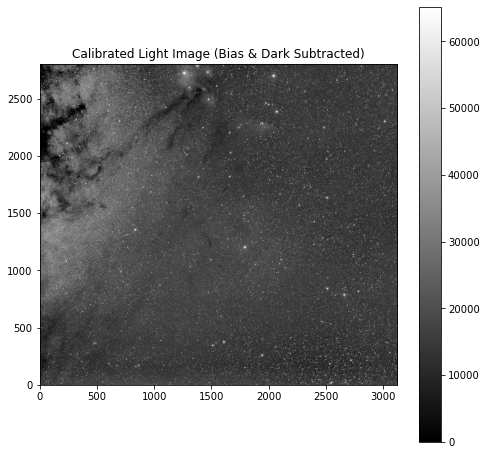

Calibrated image saved to: C:\Users\adity\Desktop\calibrated_light_image.fits


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Define paths to the FITS files
light_image_file = r"C:\Users\adity\Desktop\test1_lights_L.fits"
dark_frame_file = r"C:\Users\adity\Desktop\realistic_fake_dark_frame.fits"
bias_frame_file = r"C:\Users\adity\Desktop\fake_bias_frame.fits"

# Verify all files exist
files = [light_image_file, dark_frame_file, bias_frame_file]
for file in files:
    if not os.path.exists(file):
        print(f"Error: File not found: {file}")
        exit()
    else:
        print(f"File verified: {file}")

# Load the FITS files
with fits.open(light_image_file) as light_hdul:
    light_image_data = light_hdul[0].data
    print(f"Loaded light image with shape: {light_image_data.shape}")

with fits.open(dark_frame_file) as dark_hdul:
    dark_frame_data = dark_hdul[0].data
    print(f"Loaded dark frame with shape: {dark_frame_data.shape}")

with fits.open(bias_frame_file) as bias_hdul:
    bias_frame_data = bias_hdul[0].data
    print(f"Loaded bias frame with shape: {bias_frame_data.shape}")

# Perform calibration
if light_image_data.shape == dark_frame_data.shape == bias_frame_data.shape:
    # Step 1: Subtract the bias frame from the light image
    bias_subtracted_image = light_image_data - bias_frame_data
    
    # Step 2: Subtract the dark frame from the bias-subtracted image
    calibrated_image = bias_subtracted_image - dark_frame_data
    
    # Step 3: Clip negative values to 0 (optional)
    calibrated_image[calibrated_image < 0] = 0
    
    # Display the calibrated image
    plt.figure(figsize=(8, 8))
    plt.imshow(calibrated_image, cmap='gray', origin='lower')
    plt.colorbar()
    plt.title("Calibrated Light Image (Bias & Dark Subtracted)")
    plt.show()

    # Save the calibrated image as a new FITS file
    calibrated_fits_file = r"C:\Users\adity\Desktop\calibrated_light_image.fits"
    fits.writeto(calibrated_fits_file, calibrated_image.astype(np.float32), overwrite=True)
    print(f"Calibrated image saved to: {calibrated_fits_file}")
else:
    print("Error: Image dimensions do not match for light, dark, and bias frames.")


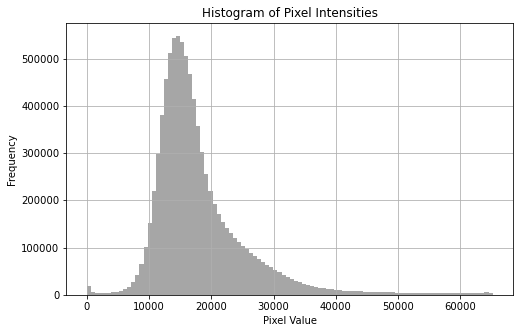

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the calibrated image
with fits.open(r"C:\Users\adity\Desktop\calibrated_light_image.fits") as hdul:
    calibrated_image = hdul[0].data

# Plot: Histogram of Pixel Intensities
plt.figure(figsize=(8, 5))
plt.hist(calibrated_image.ravel(), bins=100, color='gray', alpha=0.7)
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Smoothed image saved to: C:\Users\adity\Desktop\smoothed_light_image.fits


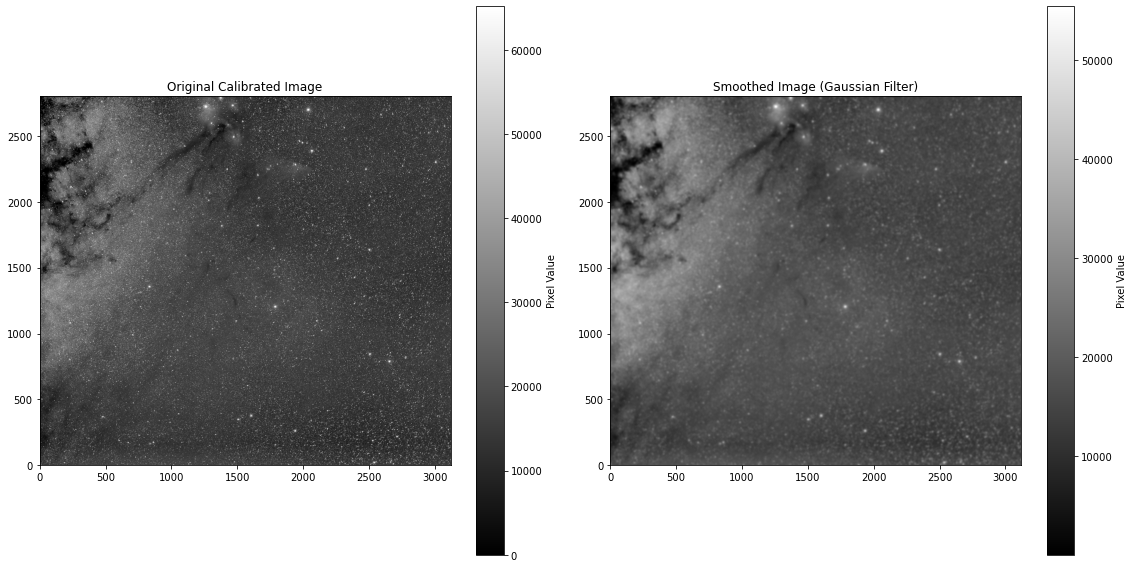

In [6]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the calibrated image
with fits.open(r"C:\Users\adity\Desktop\calibrated_light_image.fits") as hdul:
    calibrated_image = hdul[0].data

# Apply Gaussian filter for noise reduction
sigma = 6  # Standard deviation for Gaussian kernel (adjust for smoothing strength)
smoothed_image = gaussian_filter(calibrated_image, sigma=sigma)

# Save the smoothed image to a new FITS file
smoothed_fits_file = r"C:\Users\adity\Desktop\smoothed_light_image.fits"
fits.writeto(smoothed_fits_file, smoothed_image.astype(np.float32), overwrite=True)
print(f"Smoothed image saved to: {smoothed_fits_file}")

# Plot the original vs smoothed images
plt.figure(figsize=(16, 8))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(calibrated_image, cmap='gray', origin='lower')
plt.colorbar(label="Pixel Value")
plt.title("Original Calibrated Image")

# Smoothed image
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray', origin='lower')
plt.colorbar(label="Pixel Value")
plt.title("Smoothed Image (Gaussian Filter)")

plt.tight_layout()
plt.show()


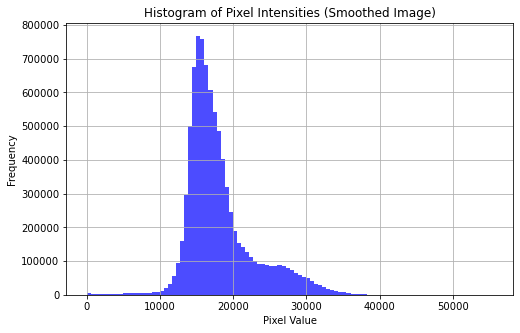

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the smoothed image
with fits.open(r"C:\Users\adity\Desktop\smoothed_light_image.fits") as hdul:
    smoothed_image = hdul[0].data

# Plot: Histogram of Pixel Intensities
plt.figure(figsize=(8, 5))
plt.hist(smoothed_image.ravel(), bins=100, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Intensities (Smoothed Image)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
